# **Laboratorio 2**

**Integrantes**


**Estudiante 1:**
Juan Miguel Manrique - 202021447

**Estudiante 2:**
Andrés Felipe Gómez García - 202021189

**Estudiante 3:**
Sebastian Contreras Salazar - 202020903

# 1. Preparación de datos

## Exploración Inicial

Para empezar con la preparación de los datos, se revisarán las distribuciones de las variables numéricas y categóricas principales del dataset. Esto, con el objetivo de detectar valores atípicos o desbalanceos antes del análisis del modelo.

### Carga de datos

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# cargar datos
df = pd.read_csv('data/Datos_senecaféAlpes.csv', sep=';')

# dimensiones del dataframe
print("Dimensiones del DataFrame:", df.shape)

# primeras 5 registros
display(df.head())

Dimensiones del DataFrame: (14291, 19)


ID   Area  Perimetro  LongitudEjeMayor  LongitudEjeMenor  \
0  G006149  50836   923618.0        358.515147        181.388899   
1  G007234  62764  1003767.0        409.207082        198.330199   
2  G007054  59965   994266.0        389.088529        197.967275   
3  G006619  55035      917.6        379.346822        185.390577   
4  G013353  39324   737773.0        262.520242        191.176858   

  RelacionAspecto  Excentricidad  AreaConvexa  DiametroEquivalente    Medida  \
0        alargado            NaN          NaN           254.413847  0.804762   
1        Alargado            NaN      64158.0           282.689948  0.703995   
2        Alargado       0.860886      60910.0           276.314692  0.661581   
3        Alargado       0.872446      55591.0                  NaN  0.799695   
4        Alargado       0.685326      39758.0           223.760747  0.775392   

    Solidez  Redondez  Compacidad  FactorForma1  FactorForma2  FactorForma3  \
0  0.983840  0.748853    0.709632      0.007052      0.001103      0.503578   
1  0.978272  0.782807    0.690824      0.006520      0.000916      0.477237   
2  0.984485  0.762259    0.710159      0.006489      0.001018      0.504326   
3  0.989998  0.821376    0.697811      0.006893      0.001008      0.486941   
4  0.989084  0.907867    0.852356      0.006676      0.002174      0.726511   

   FactorForma4 DefectoVisible MétodoSecado  
0      0.995321         Normal       Lavado  
1      0.984666            NaN      Natural  
2      0.991211         Normal      Natural  
3      0.996380         Normal       Lavado  
4      0.997630         Normal       Lavado

### Visualizaciones gráficas

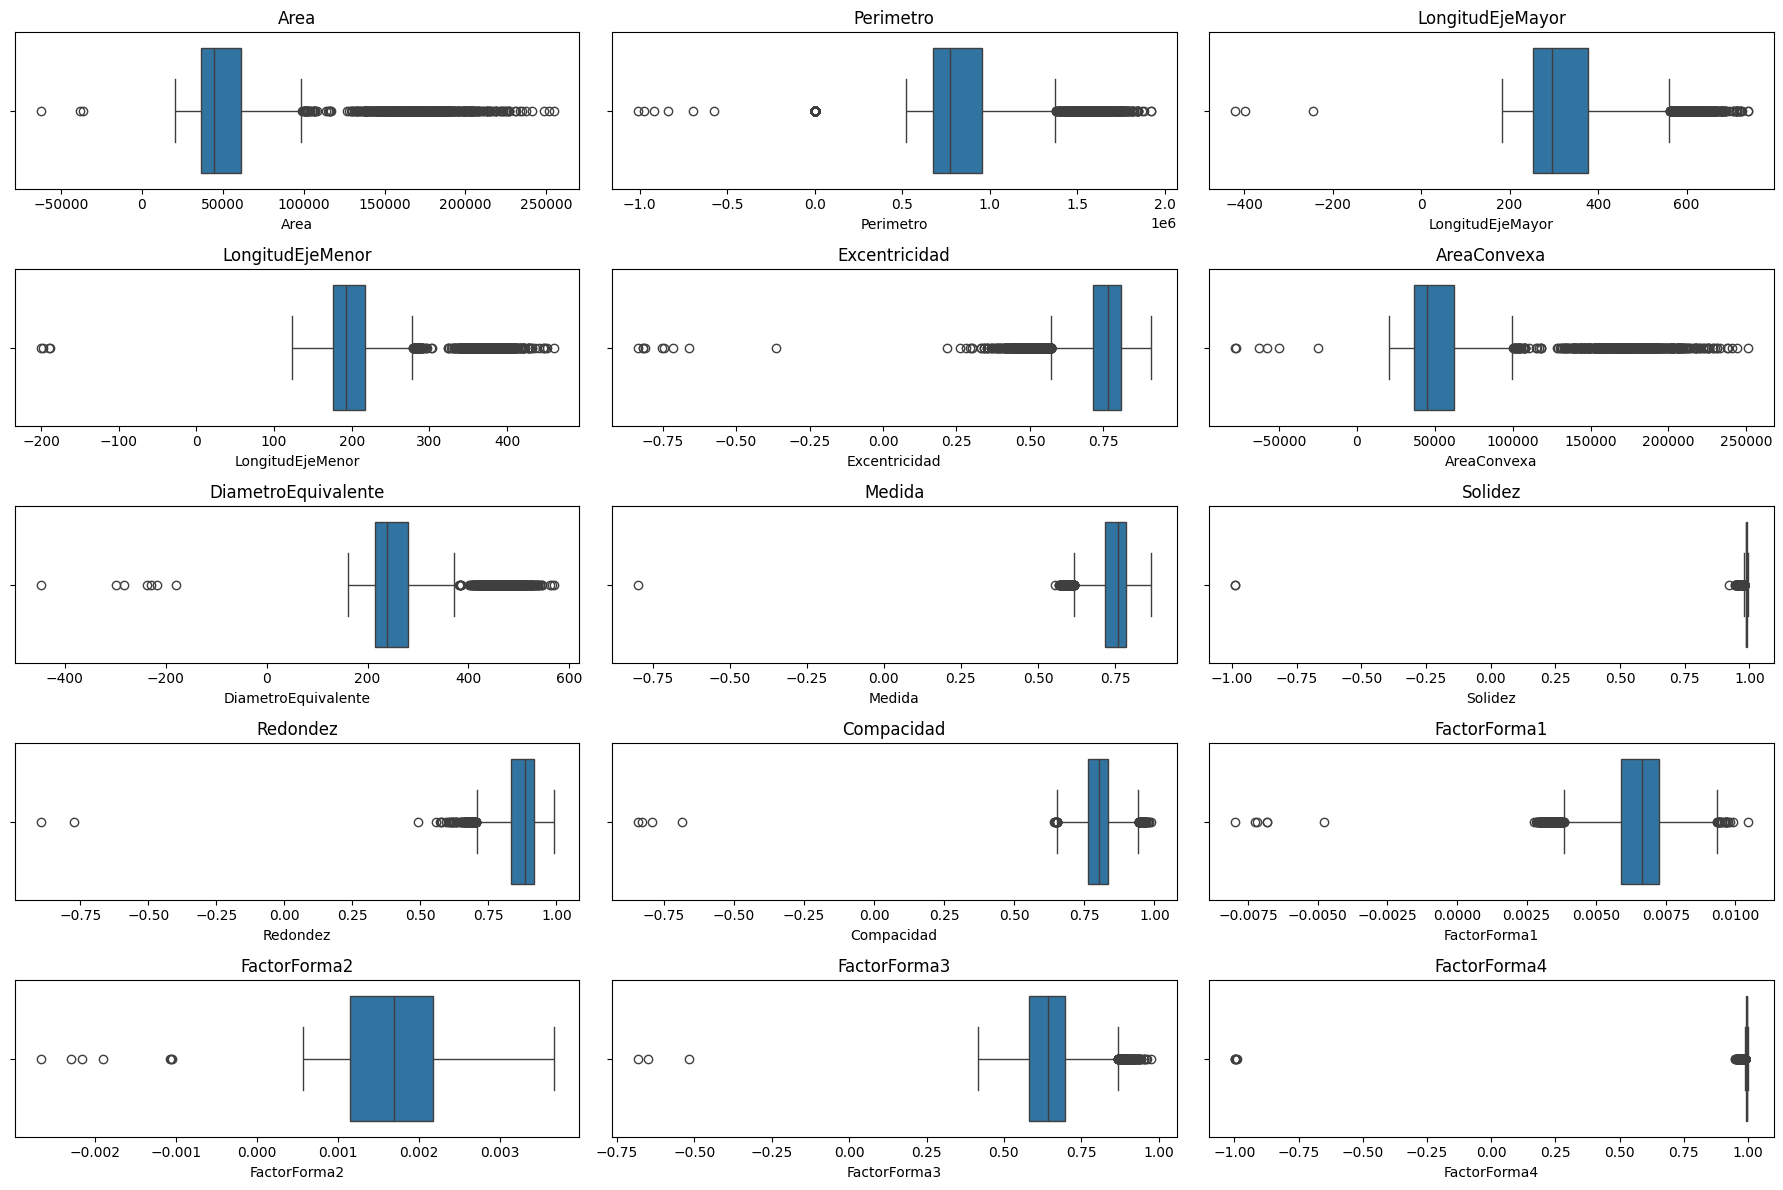

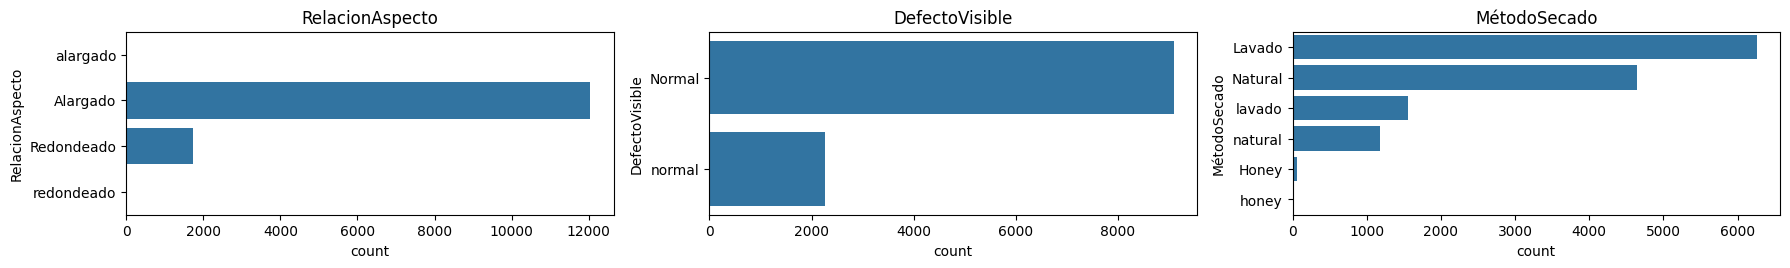

In [46]:
# Boxplot de variables numéricas
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)  # 5 rows, 3 columns = 15 subplots
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Plots de barras para variables categóricas, excepto 'ID'
cat_cols = df.select_dtypes(include='object').columns
cat_cols = cat_cols[cat_cols != 'ID']  # Excluir 'ID'
plt.figure(figsize=(18, 12))
for i, col in enumerate(cat_cols):
    plt.subplot(5, 3, i + 1)  # 5 rows, 3 columns = 15 subplots
    sns.countplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Para el caso de las variables númericas, se presentan una cantidad amplia de outliers. Para el caso de las variables categóricas, hay un desbalenceo considerable en MétodoSecado y RelaciónAspecto. A su vez, se identifica que no hay consistencia en los datos dado que hay formatos diferentes para una misma categoría. En MétodoSecado, las categorías 'lavado', 'natural' y 'honey' se repiten pero con mayúscula, al igual que en RelaciónAspecto y DefectoVisible. En la limpieza de los datos, se trataran dichas inconsistencias y se reduciran la cantidad de outliers.

## Limpieza

Para la limpieza, se realizó lo siguiente:

- Eliminación de filas duplicadas para asegurar la unicidad de los datos.
- Eliminación de nulos para asegurar la completitud de los datos.
- Estandarización de las variables categoricas para asegurar la consistencia de los datos.
- Manejo de outliers en variables numéricas usando el método del rango intercuartílico para asegurar la validez de los datos.

In [47]:
#Duplicidad
print("Cantidad de filas duplicadas:", df.duplicated().sum())
#Borrar duplicados
df = df.drop_duplicates()
print("Cantidad de filas duplicadas después de eliminar:", df.duplicated().sum())
print("Dimensiones del DataFrame después de eliminar duplicados:", df.shape)
print("----------------------------------")

#Completitud de datos (revisión de nulos)
print("Cantidad de datos nulos por columna:")
print(df.isnull().sum())
#Eliminacion de nulos
df = df.dropna()
print("Cantidad de datos nulos por columna después de limpiar:")
print(df.isnull().sum())
print("Dimensiones del DataFrame después de eliminar nulos:", df.shape)
print("----------------------------------")

#Consistencia
# Estandarización de categorías en variables categóricas
df['MétodoSecado'] = df['MétodoSecado'].str.lower().str.strip()
df['RelacionAspecto'] = df['RelacionAspecto'].str.lower().str.strip()
df['DefectoVisible'] = df['DefectoVisible'].str.lower().str.strip()
print("Categorías únicas en 'MétodoSecado':", df['MétodoSecado'].unique())
print("Categorías únicas en 'RelacionAspecto':", df['RelacionAspecto'].unique())
print("Categorías únicas en 'DefectoVisible':", df['DefectoVisible'].unique())
print("----------------------------------")


# Manejo de outliers en variables numéricas usando el método del rango intercuartílico (IQR)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in num_cols:
    df = remove_outliers_iqr(df, col)
    
# Validéz de datos
# Revisión de rangos en variables numéricas
for col in num_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

Cantidad de filas duplicadas: 461
Cantidad de filas duplicadas después de eliminar: 0
Dimensiones del DataFrame después de eliminar duplicados: (13830, 19)
----------------------------------
Cantidad de datos nulos por columna:
ID                        0
Area                      0
Perimetro              1197
LongitudEjeMayor        388
LongitudEjeMenor          0
RelacionAspecto         448
Excentricidad           582
AreaConvexa            1381
DiametroEquivalente    1852
Medida                    0
Solidez                2218
Redondez               2007
Compacidad              633
FactorForma1           1087
FactorForma2           1067
FactorForma3            460
FactorForma4           1123
DefectoVisible         2832
MétodoSecado            562
dtype: int64
Cantidad de datos nulos por columna después de limpiar:
ID                     0
Area                   0
Perimetro              0
LongitudEjeMayor       0
LongitudEjeMenor       0
RelacionAspecto        0
Excentricidad        

Terminada la limpieza, revisamos las dimensiones del dataframe y volvemos a realizar las visualizaciones gráficas.

Dimensiones del DataFrame después de la limpieza: (2426, 19)


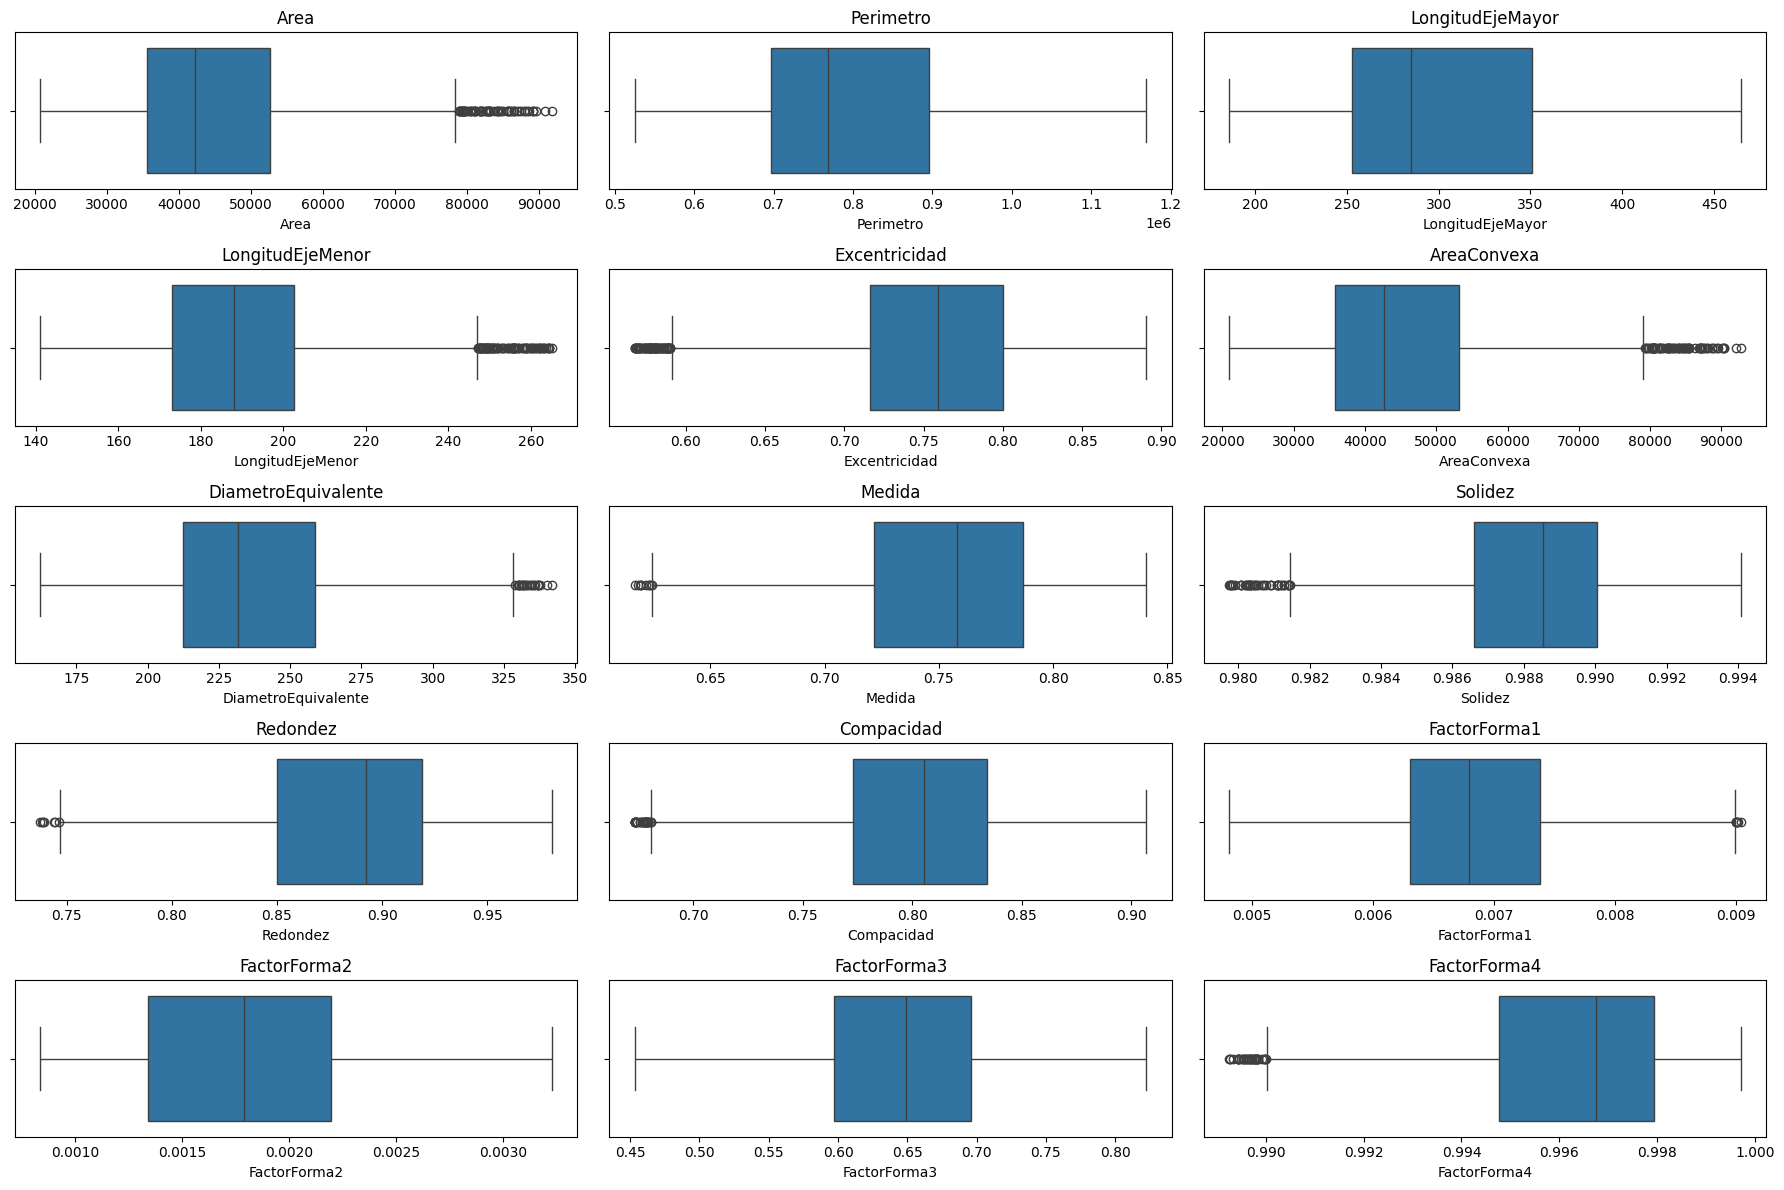

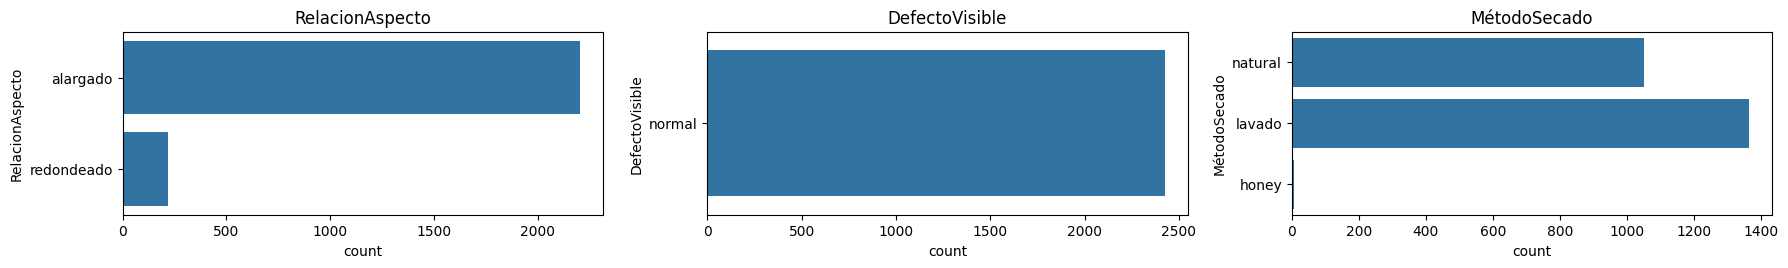

In [48]:
print("Dimensiones del DataFrame después de la limpieza:", df.shape)

# Boxplot de variables numéricas
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)  # 5 rows, 3 columns = 15 subplots
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Plots de barras para variables categóricas, excepto 'ID'
cat_cols = df.select_dtypes(include='object').columns
cat_cols = cat_cols[cat_cols != 'ID']  # Excluir 'ID'
plt.figure(figsize=(18, 12))
for i, col in enumerate(cat_cols):
    plt.subplot(5, 3, i + 1)  # 5 rows, 3 columns = 15 subplots
    sns.countplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Los histogramas son ahora consistentes, no hay variables duplicadas con formatos distintos.

## Preparación y Exploración de Grupos

Antes de agrupar, conviene intuir si existen separaciones naturales entre granos según sus atributos morfológicos.

Se realizarán algunas visualizaciones gráficas que permitiran ver patrones de separación, detectar sesgos de escala, notar asimetrías y ver outliers.

Para ello se seleccionaron las siguientes variables numericas:

- Área
- Perímetro
- Excentricidad
- Redondez
- DiametroEquivalente
- Medida

Y las siguientes variables categóricas (se excluye DefectoVisible dado que no se tienen registro de tipo: 'Defectuoso' en el dataset):

- MétodoSecado
- RelaciónAspecto

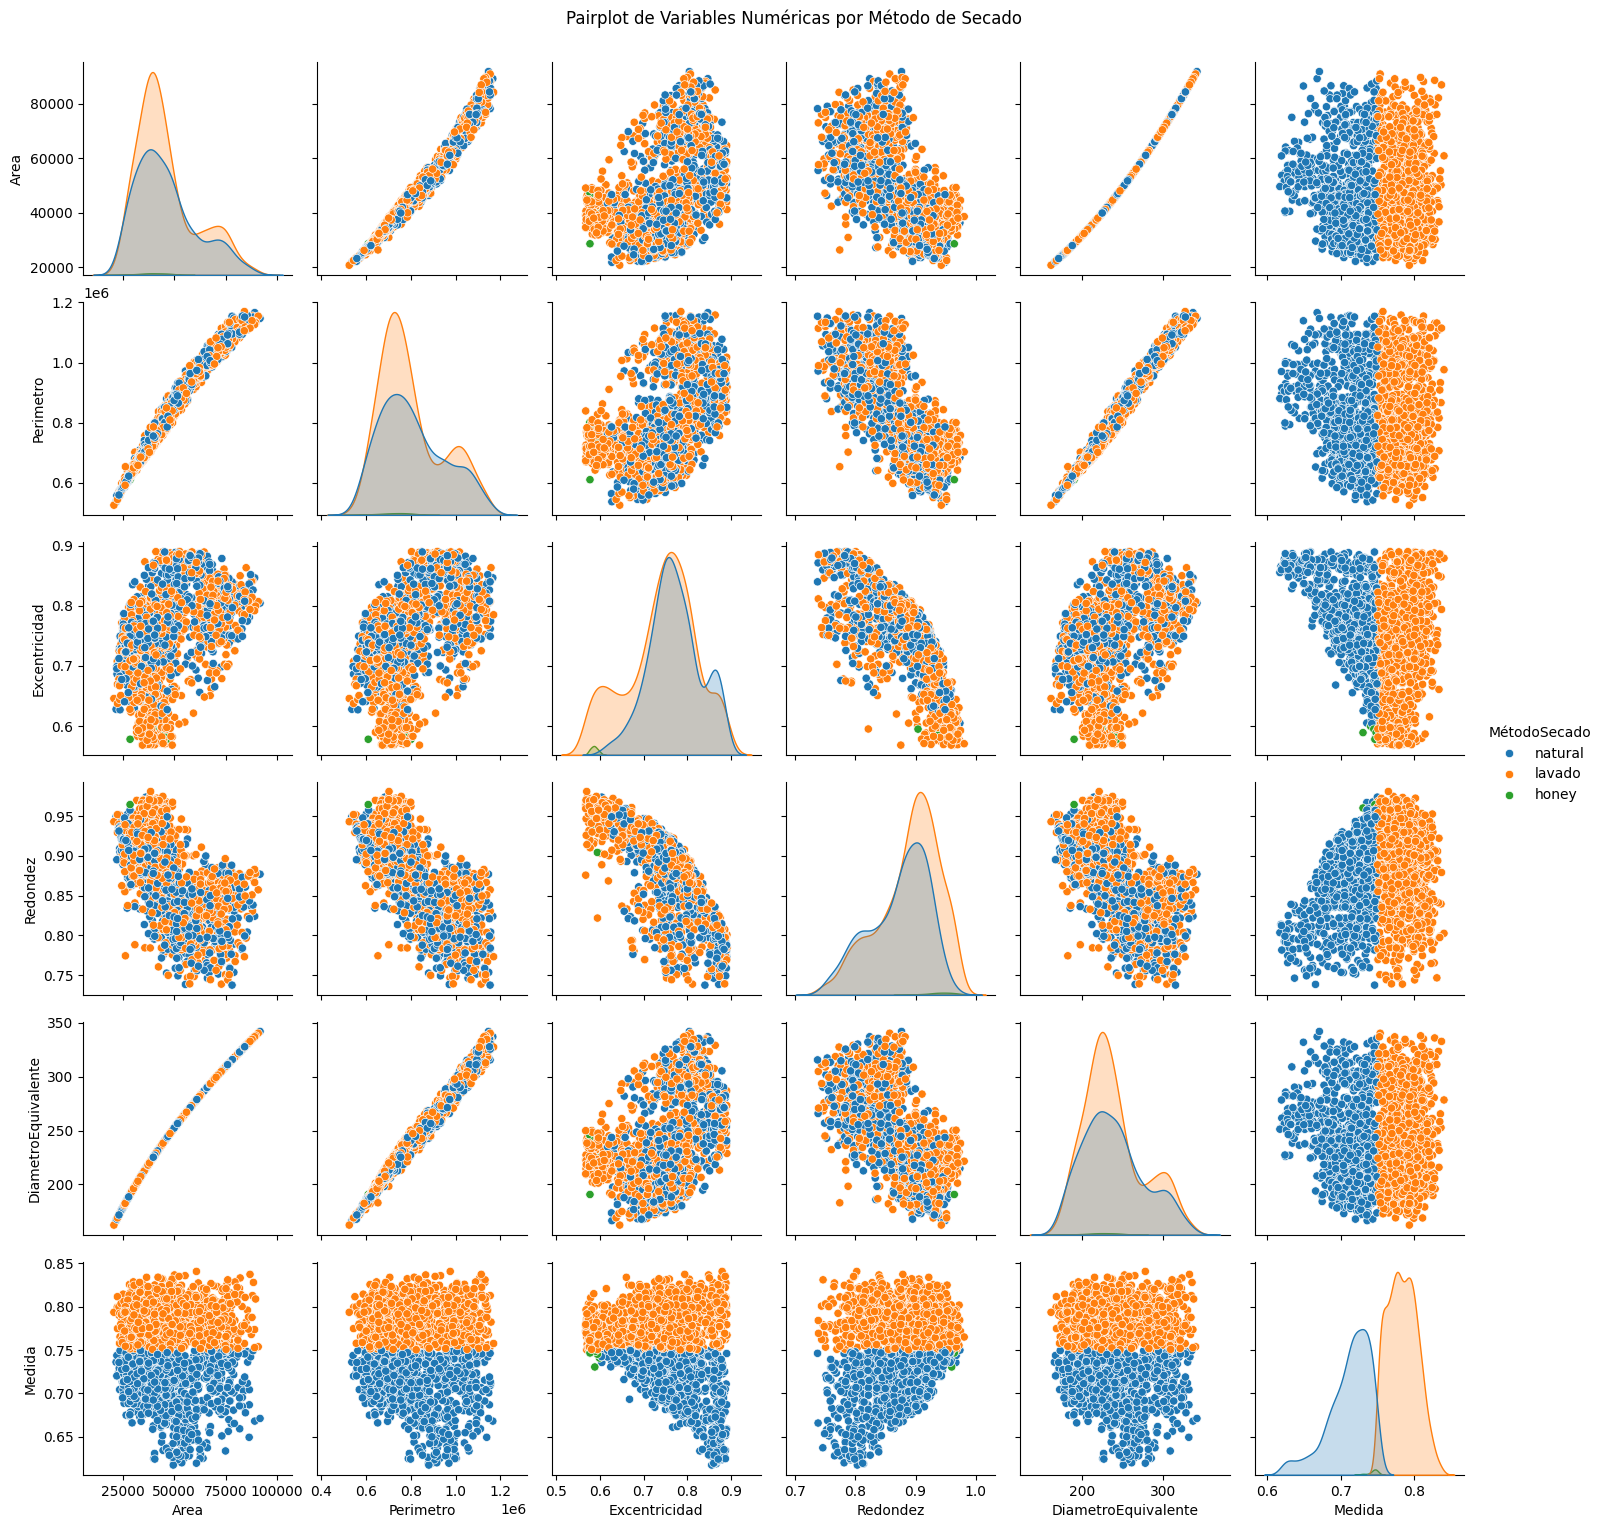

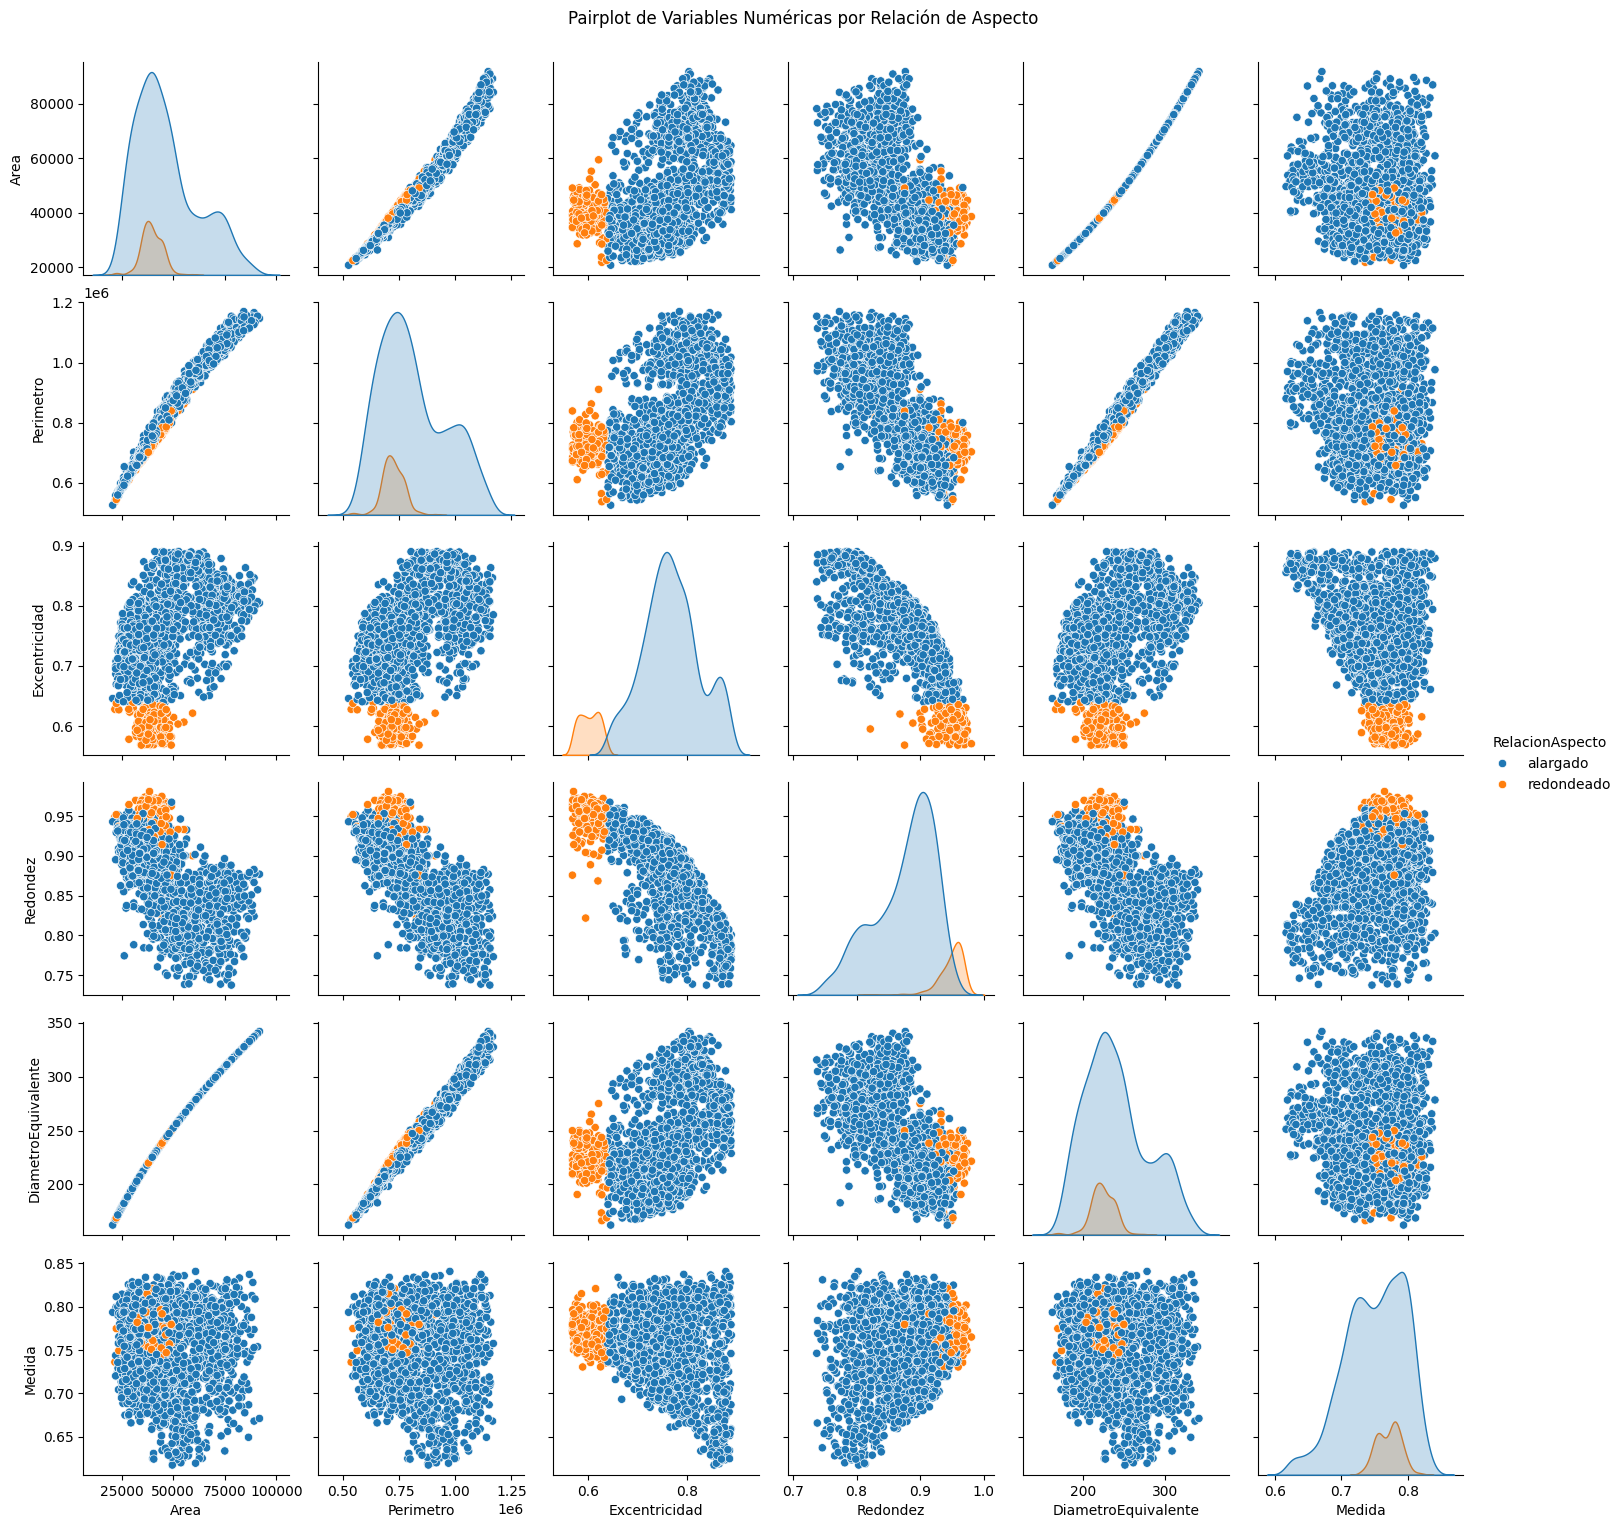

In [49]:
#Selección de variables numéricas para análisis posterior
variables_numericas = ['Area', 'Perimetro', 'Excentricidad', 'Redondez', 'DiametroEquivalente', 'Medida']

#Pairplot (all vs all) por MetodoSecado
sns.pairplot(df, vars=variables_numericas, hue='MétodoSecado', diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas por Método de Secado', y=1.02)
plt.show()

#Pariplot (all vs all) por RelacionAspecto
sns.pairplot(df, vars=variables_numericas, hue='RelacionAspecto', diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas por Relación de Aspecto', y=1.02)
plt.show()

A partir de las visualizaciones gráficas tenemos las siguientes interpretaciones:

- Para una agrupacion por Relación de Aspecto excentricidad y redondez separan bien las dos categorías. Se esperan dos grupos claros en el espacio de dicha variable.
- Hay variables redundantes: Área, Perímetro y Diámetro equivalente se asemejan bastante, se pueden seleccionar solo algunas variables para no sesgar las distancias.
- Para una agrupación por Método de Secado, con morfología hay mucha superposición. 'Medida' muestra una separación parcial, por tanto, si queremos que el modelo recupere los métodos de secado, es necesario incluir esta variable.

Se realizarán las mismas gráficas pero esta vez para las variables númericas:

- FactorForma1
- FactorForma2
- FactorForma3
- FactorForma4

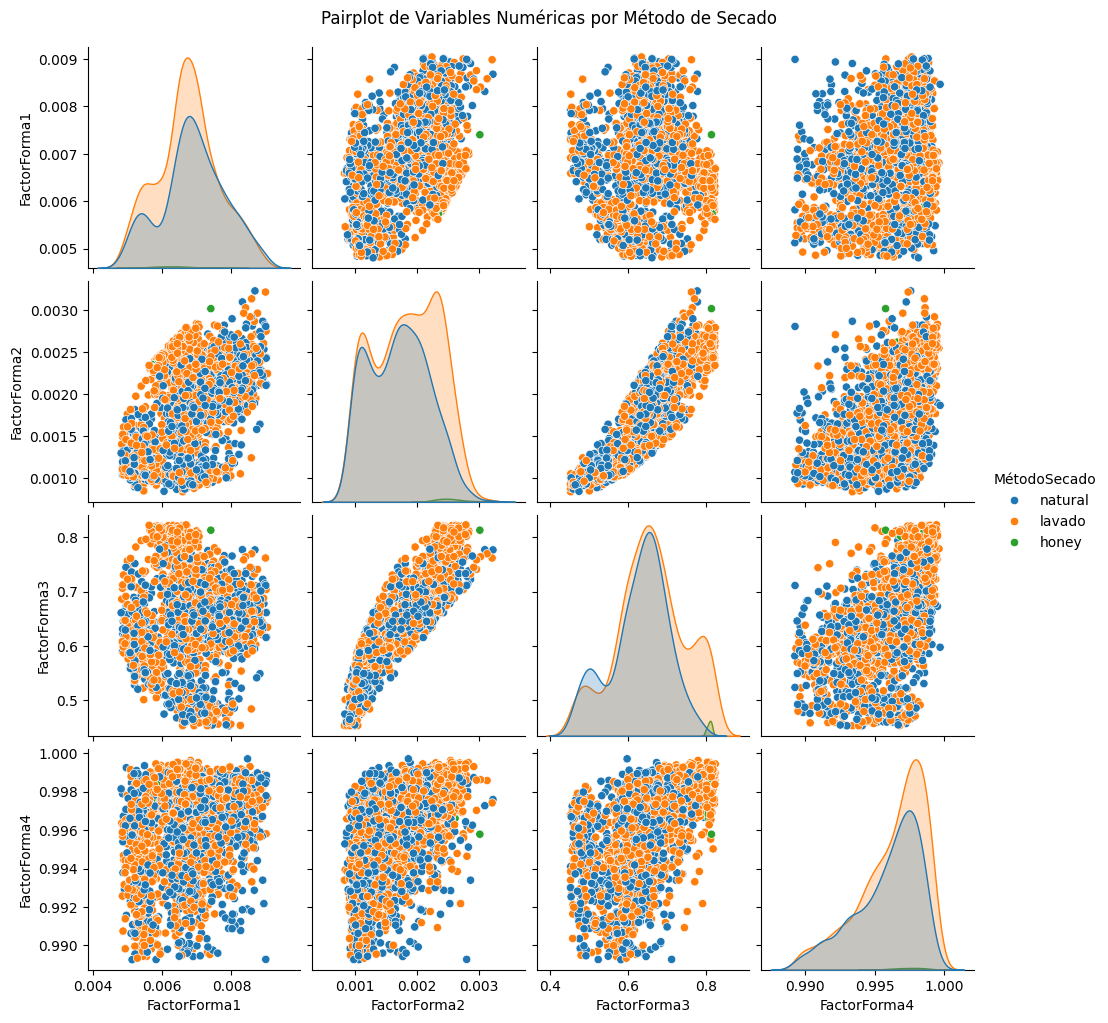

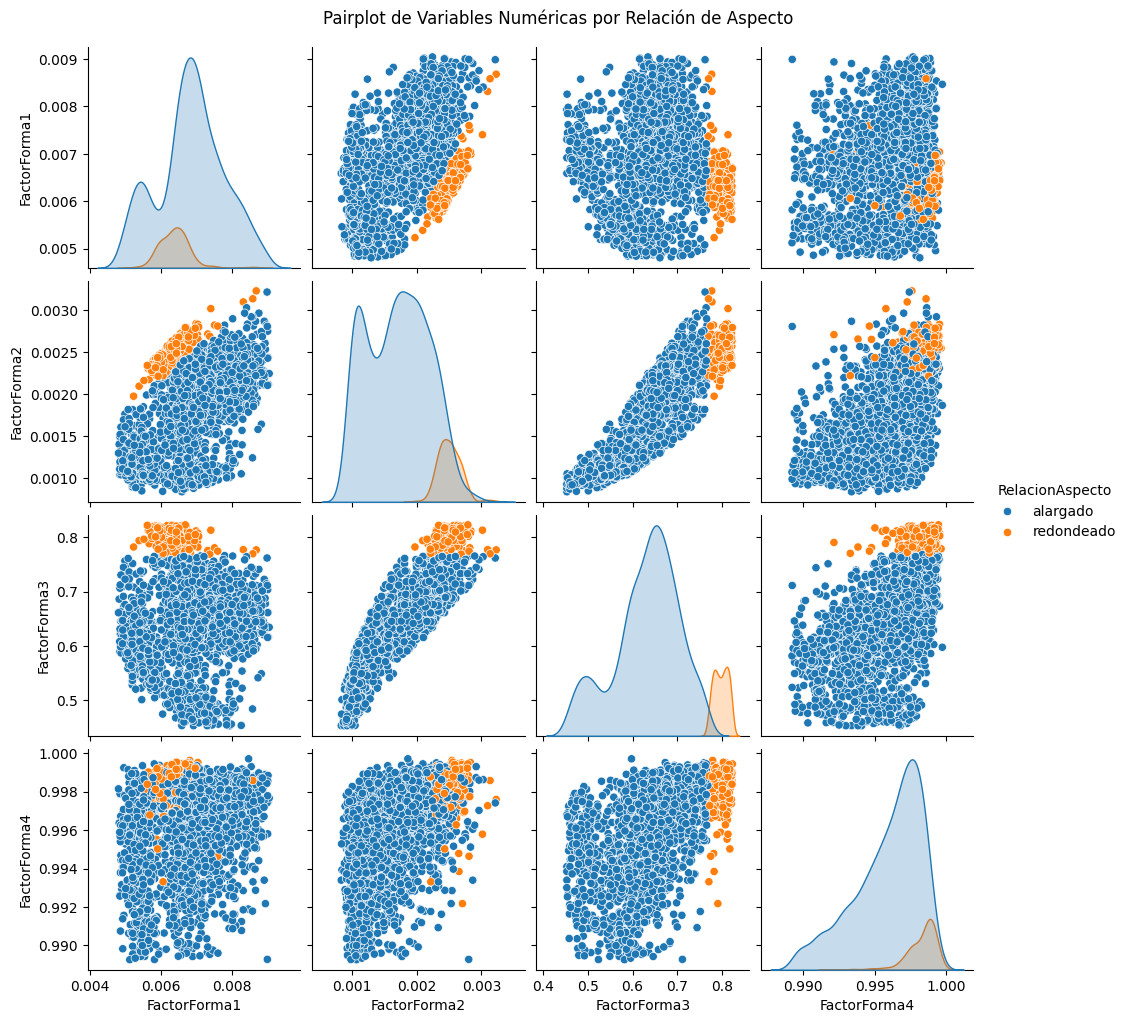

In [50]:
#Selección de variables numéricas para análisis posterior
variables_numericas = ['FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4']

#Pairplot (all vs all) por MetodoSecado
sns.pairplot(df, vars=variables_numericas, hue='MétodoSecado', diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas por Método de Secado', y=1.02)
plt.show()

#Pariplot (all vs all) por RelacionAspecto
sns.pairplot(df, vars=variables_numericas, hue='RelacionAspecto', diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas por Relación de Aspecto', y=1.02)
plt.show()


- Los Factores de Forma (1–3) sí separan la Relación de Aspecto (alargado vs redondeado), en especial FF3 (y FF2).

- Los métodos de secado no muestran separación clara en estos factores: si el objetivo fuera encontrar grupos por secado, estos 4 factores no parecen útiles.

- Para considerar en la selección de variables:

    - Mantener: FF1, FF2, FF3.

    - Descartar: FF4, dado que hay varianza casi nula.

- Hay la colinealidad entre FF2 y FF3, para un algoritmo como K-means, esto puede sobreestimar la importancia de esa dimensión. Para K-means se conservará solo una variable.

- Qué esperar de los clusters:

    - Con estas variables, lo más natural es que salgan dos grupos grandes alineados con alargado y redondeado.


Se realizarán las visualizaciones gráficas para las variables numericas faltantes:

- LongitudEjeMayor
- LongitudEjeMenor
- ÁreaConvexa
- Compacidad
- Solidez

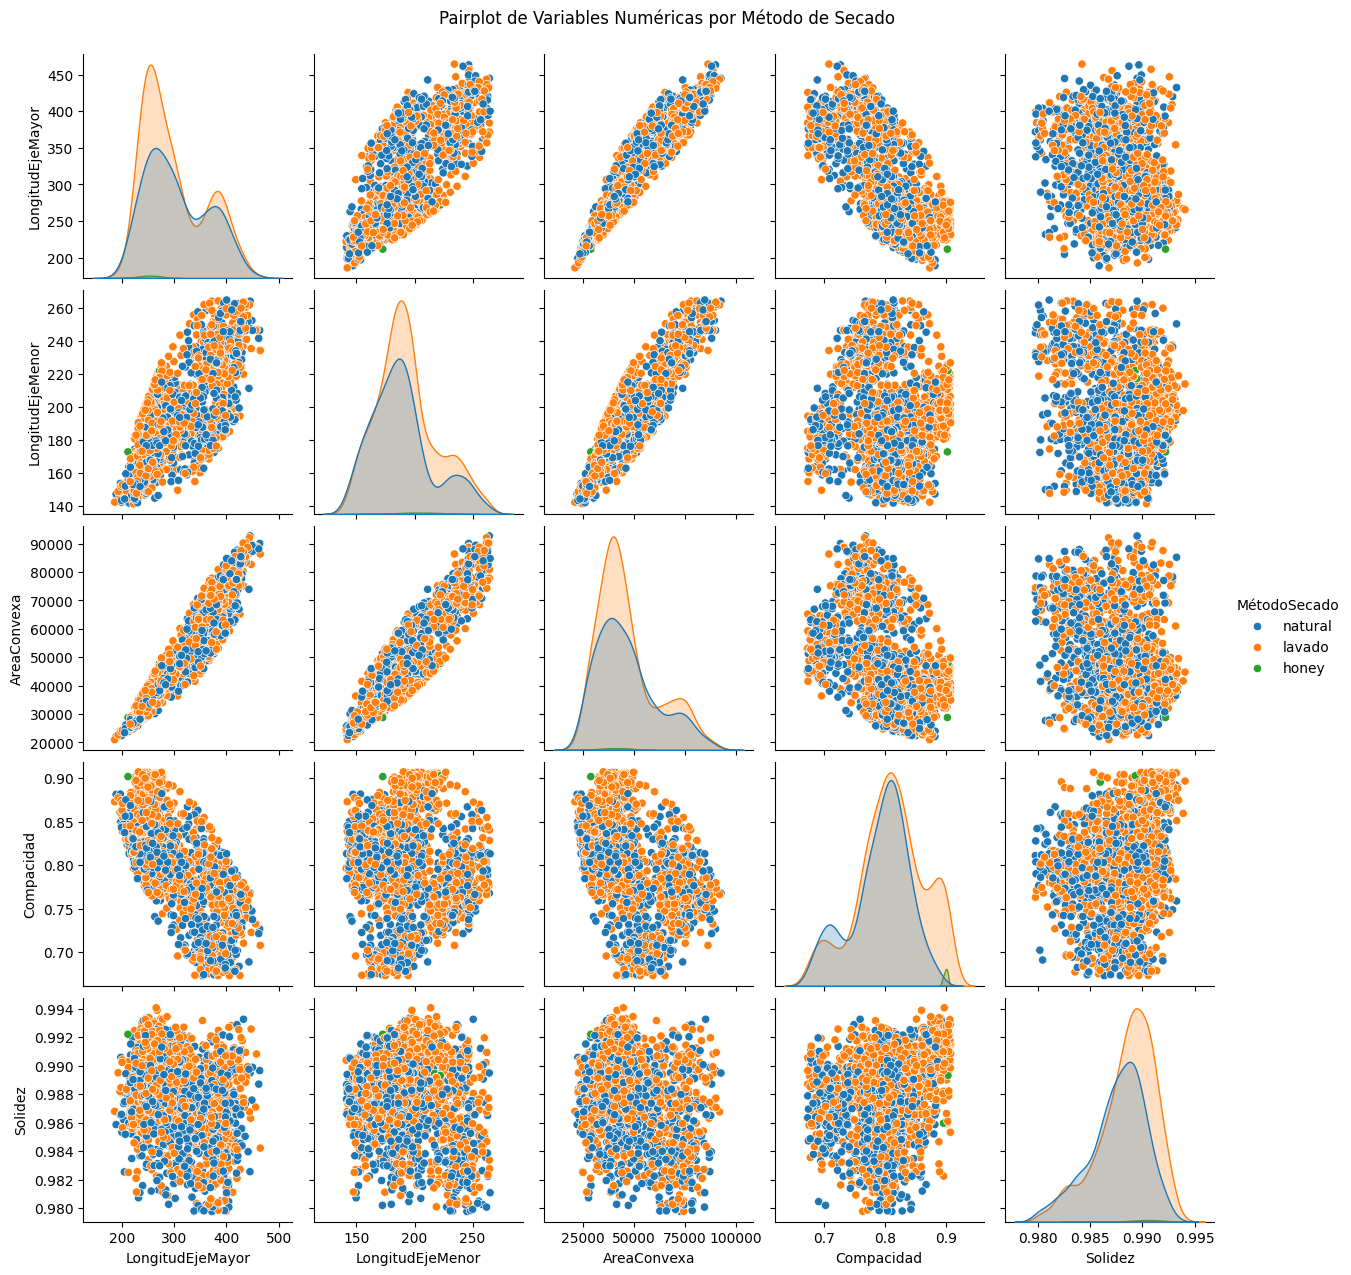

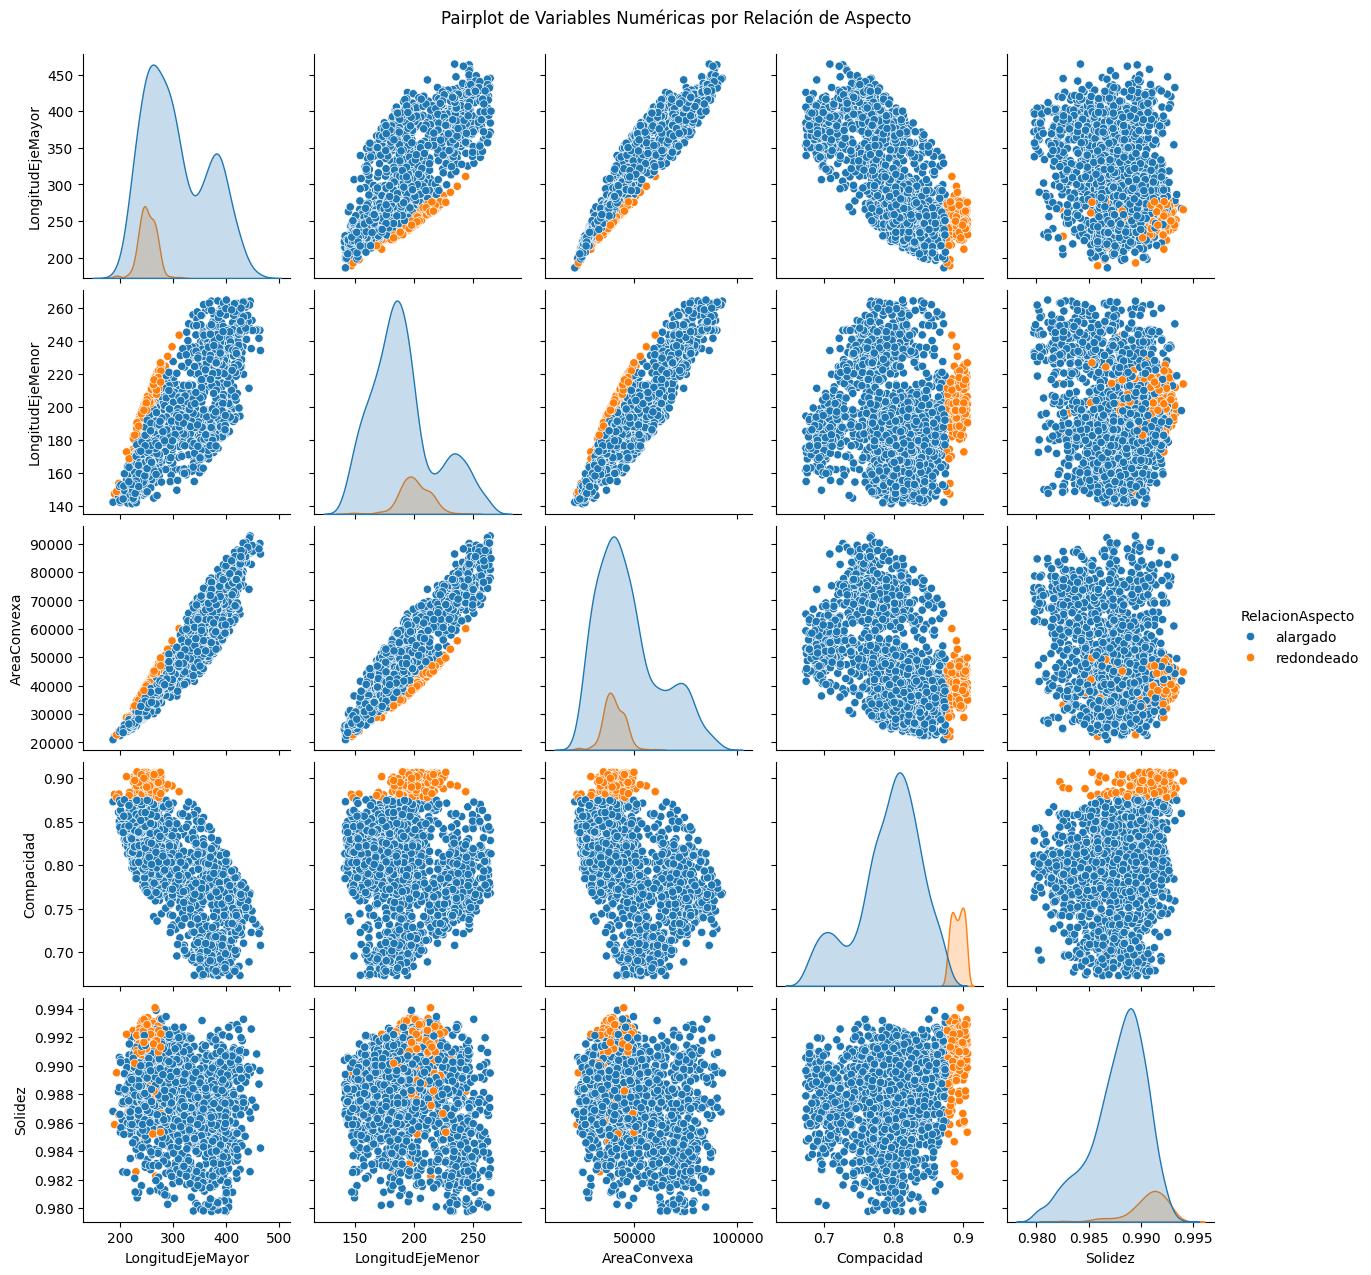

In [51]:
#Selección de variables numéricas para análisis posterior
variables_numericas = ['LongitudEjeMayor', 'LongitudEjeMenor', 'AreaConvexa', 'Compacidad', 'Solidez']

#Pairplot (all vs all) por MetodoSecado
sns.pairplot(df, vars=variables_numericas, hue='MétodoSecado', diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas por Método de Secado', y=1.02)
plt.show()

#Pariplot (all vs all) por RelacionAspecto
sns.pairplot(df, vars=variables_numericas, hue='RelacionAspecto', diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas por Relación de Aspecto', y=1.02)
plt.show()

Para Método de secado: 

- De las numéricas, Solidez es candidata a descartar por baja varianza.

- Por la colinealidad entre ÁreaConvexa y las longitudes, para K-means puede resultar conveniente quedarse con una sola variable.

Para Relación de Aspecto:

- Los granos redondeados se concentran en valores más bajos de LongitudEjeMayor/Menor y ÁreaConvexa y muestran valores más altos de Compacidad.

- Los alargados ocupan el rango mayor de longitudes/área y tienden a menor compacidad.

- Solidez vuelve a tener poca variación.

## Ingeniería de Características

Con las interpretaciones anteriores, se prepararán los datos para los algoritmos de agrupación considerando las siguientes variables:

- Área
- FactorForma1
- FactorForma2
- FactorForma3
- Medida
- Excentricidad
- Redondez
- MétodoSecado
- RelaciónAspecto

Se codificarán las variables categóricas (con OneHotEncoder) y se normalizarán las variables numéricas.

In [52]:
from sklearn.preprocessing import StandardScaler

features = ['Area', 'FactorForma1', 'FactorForma2', 'FactorForma3', 'Medida', 'Excentricidad', 'Redondez', 'MétodoSecado', 'RelacionAspecto']

df_features = df[features].copy()

# Codificación de variables categóricas
df_features = pd.get_dummies(df_features, columns=['MétodoSecado', 'RelacionAspecto'], drop_first=True)
print("Datos codificados:")
display(df_features.head())

# Estandarización de variables numéricas
variables_numericas = ['Area', 'FactorForma1', 'FactorForma2', 'FactorForma3', 'Medida', 'Excentricidad', 'Redondez']

scaler = StandardScaler()
df_features[variables_numericas] = scaler.fit_transform(df_features[variables_numericas])
print("Datos estandarizados:")
display(df_features.head())

Datos codificados:


Area  FactorForma1  FactorForma2  FactorForma3    Medida  Excentricidad  \
2   59965      0.006489      0.001018      0.504326  0.661581       0.860886   
4   39324      0.006676      0.002174      0.726511  0.775392       0.685326   
20  36876      0.007078      0.002074      0.689141  0.716136       0.722129   
23  51408      0.005852      0.001888      0.723207  0.743610       0.688938   
27  46774      0.006536      0.001637      0.637254  0.793910       0.767022   

    Redondez  MétodoSecado_lavado  MétodoSecado_natural  \
2   0.762259                False                  True   
4   0.907867                 True                 False   
20  0.925328                False                  True   
23  0.860948                False                  True   
27  0.845613                 True                 False   

    RelacionAspecto_redondeado  
2                        False  
4                        False  
20                       False  
23                       False  
27                       False

Datos estandarizados:


Area  FactorForma1  FactorForma2  FactorForma3    Medida  \
2   0.957569     -0.346692     -1.507706     -1.694801 -2.093276   
4  -0.447021     -0.139813      0.774190      0.963838  0.534868   
20 -0.613604      0.304889      0.576818      0.516673 -0.833472   
23  0.375277     -1.050017      0.210401      0.924301 -0.199040   
27  0.059941     -0.294571     -0.284963     -0.104197  0.962490   

    Excentricidad  Redondez  MétodoSecado_lavado  MétodoSecado_natural  \
2        1.481800 -2.360846                False                  True   
4       -0.935741  0.512631                 True                 False   
20      -0.428946  0.857224                False                  True   
23      -0.886000 -0.413270                False                  True   
27       0.189247 -0.715897                 True                 False   

    RelacionAspecto_redondeado  
2                        False  
4                        False  
20                       False  
23                       False  
27                       False

# 2. Modelamiento

## Algoritmo K-means - Implementado por Juan Miguel Manrique

## Algoritmo 2 - Implementado por Andrés Felipe Gómez García  

## Algoritmo 3 - Implementado por Sebastian Contreras Salazar  

# 3. Validación cuantitativa

# 4. Validación cualitativa